이미지 분석 (비지도 학습)
* 과일 분류(100개씩 3가지)

(300, 100, 100)


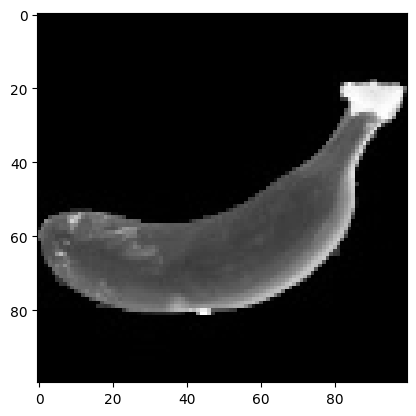

[  5   1   1   3   2  45  84  78  76  74  76  75  74  75  72  67  65  65
  64  63  62  60  59  62  58  55  54  54  53  52  50  49  51  52  53  53
  54  56  59  62  65  67  71  74  76  79  83  86  90  94  97  99 102 105
 108 112 115 120 124 127 133 138 143 149 155 156 157 162 170 174 175 176
 181 187 194 201 204 206 210 216 222 225 228 232 234 236 237 237 237 235
 237 238 234 229 114   1   1   1   1   1]


In [ ]:
#파일 가져오기 위한 유닉스 쉘 명령어(!-트리거)
#!wget https://bit.ly/fruits_300_data -o fruits_300.npy
#!ls -al

import numpy as np
#데이터는 역상으로 되어 있다. 분석을 더 잘하기 위해.
fruits = np.load('fruits_300_data')
print(fruits.shape)

import matplotlib.pyplot as plt
plt.imshow(fruits[299],cmap='gray')
plt.show()
print(fruits[0,50,:])

(100, 10000)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


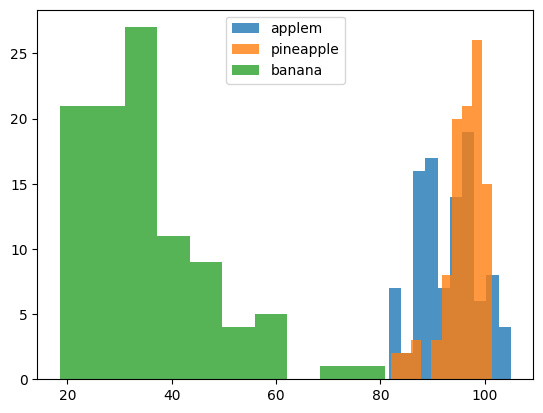

In [ ]:
import numpy as np
fruits = np.load('fruits_300_data')

apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

print(apple.shape)
#사과 사진 하나당 평균값 하나
print(apple.mean(axis=1)) #1이면 수평, 0이면 수직

#히스토그램(빈도수)
plt.hist(apple.mean(axis=1),alpha=0.8)
plt.hist(pineapple.mean(axis=1),alpha=0.8)
plt.hist(banana.mean(axis=1),alpha=0.8)
plt.legend(['applem','pineapple','banana'])
plt.show()

#결론: 각 사진의 10000개 픽셀의 평균을 통해 구분하려 했으나, 사과와 파인애플은 여전히 구분이 어려움

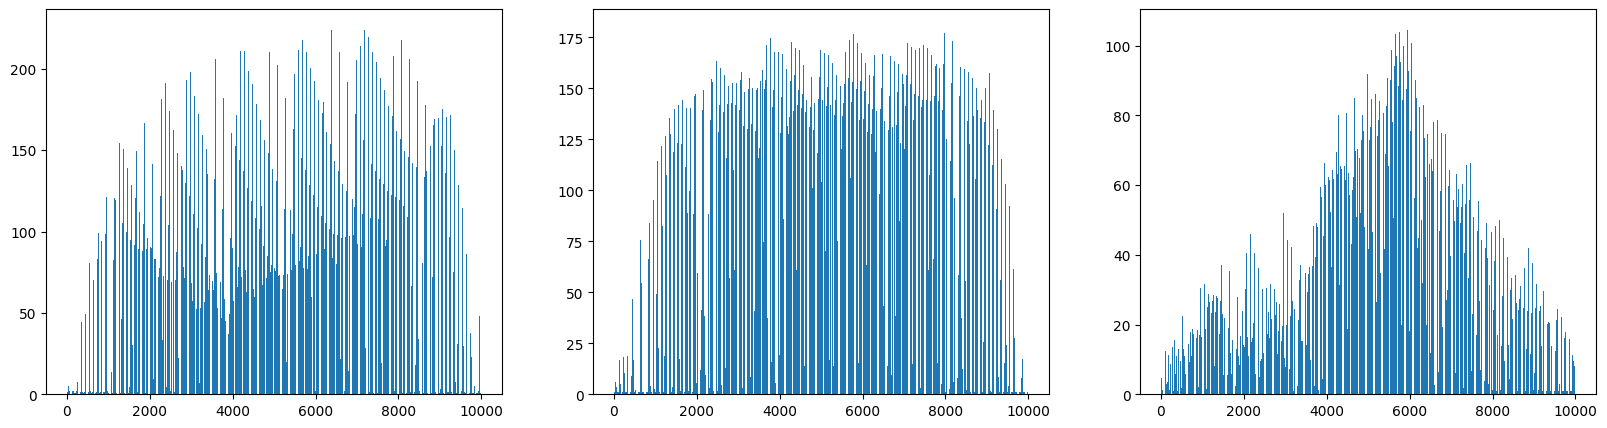

In [6]:
#!wget https://bit.ly/fruits_300_data -o fruits_300.npy
#!ls -al
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300_data')

apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000),apple.mean(axis=0))
axs[1].bar(range(10000),pineapple.mean(axis=0))
axs[2].bar(range(10000),banana.mean(axis=0))
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300_data')

apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

apple_mean = apple.mean(axis=0).reshape(100,100)
pineapple_mean = pineapple.mean(axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)

abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff,axis=(1,2))
print(abs_diff.shape)
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[0:100]
print(apple_index)

(300, 100, 100)
(300,)
[285 212 261 291 208 286 284 265 219 264 252 290 276 283 255 203 266 200
 201 269 247 256 281 270 211 254 268 239 299 225 250 275 280 232 246 205
 244 263 297 224 279 262 289 288 238 287 218 245 217 230 274 295 209 220
 213 267 237 229 248 278 243 204 228 206 207 272 210 241 233 222 214 253
 277 235 240 282 294 271 296 249 215 258 227 259 202 236 293 260 226 216
 292 257 221 298 251 223 242 231   9  88]
